In [1]:
%matplotlib inline

from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from src.config import PATH_DATA_RAW
from src.data.helpers import average_cabin_numbers, split_ticket_numbers

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890

<AxesSubplot:>

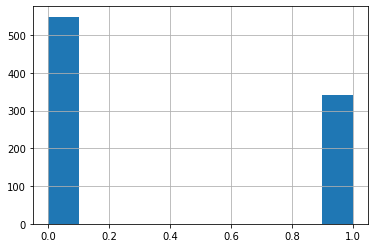

In [2]:
x = pd.read_csv(Path(PATH_DATA_RAW) / "train.csv")
x = x.convert_dtypes()
print(x.describe())
print(x.shape)
x.info()
y = x["Survived"]
y.hist()

In [4]:
x.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Explore and split cabin feature into deck and cabin number

In [5]:
x_non_na = x.dropna().copy()
x_non_na["Deck"] = x_non_na["Cabin"].str[:1]
x_non_na = average_cabin_numbers(x_non_na)

# Split ticket into its pre number and suffix number

In [7]:
x_non_na = split_ticket_numbers(x_non_na)
x_non_na = x_non_na.drop(columns=["Cabin", "Ticket"])

In [9]:
pd.set_option('display.max_rows', 1000)
x_non_na.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Cabin_number,Ticket_prenumber,Ticket_number
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,85.0,PC,17599
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1,S,C,123.0,blank,113803
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,E,46.0,blank,17463
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7,S,G,6.0,PP,9549
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.55,S,C,103.0,blank,113783
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,13.0,S,D,56.0,blank,248698
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,35.5,S,A,6.0,blank,113788
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0,S,C,25.0,blank,19950
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,76.7292,C,D,33.0,PC,17572
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,61.9792,C,B,30.0,blank,113509


<AxesSubplot:>

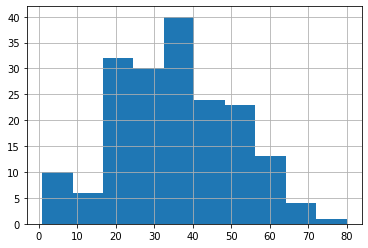

In [10]:
x_non_na["Age"].hist()

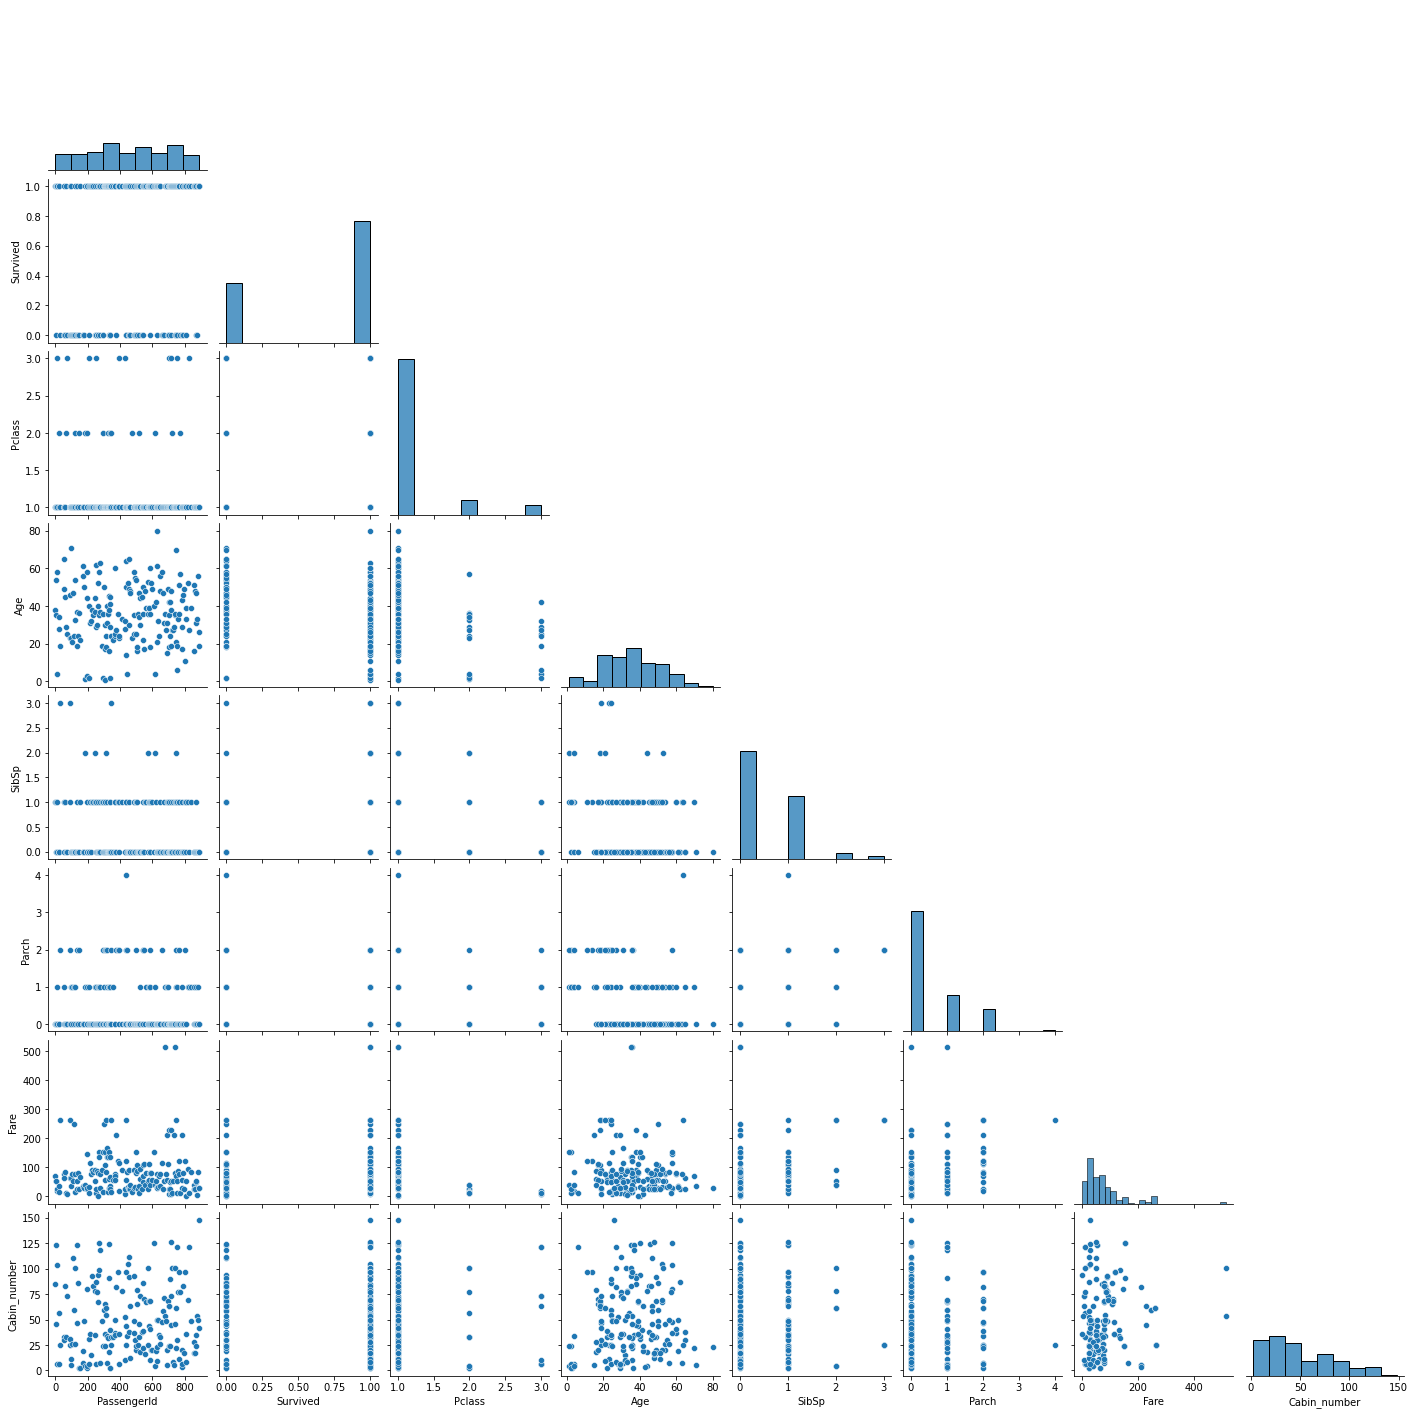

In [11]:
sns.pairplot(x_non_na, corner=True)

# Split data

In [8]:
#x = x.drop(columns = ["Survived"])
#x_train, x_val = train_test_split()